In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-metrics/real-data.csv
/kaggle/input/covid-notifications/descarga.json


In [43]:
# load df
df_covid_not = pd.read_json("/kaggle/input/covid-notifications/descarga.json")
df_covid_not.head()

,country,country_code,continent,population,indicator,year_week,source,note,weekly_count,cumulative_count,rate_14_day
0,Austria,AUT,Europe,8978929,cases,2020-01,TESSy COVID-19,,NaN,NaN,NaN
1,Austria,AUT,Europe,8978929,cases,2020-02,TESSy COVID-19,,NaN,NaN,NaN
2,Austria,AUT,Europe,8978929,cases,2020-03,TESSy COVID-19,,NaN,NaN,NaN
3,Austria,AUT,Europe,8978929,cases,2020-04,TESSy COVID-19,,NaN,NaN,NaN
4,Austria,AUT,Europe,8978929,cases,2020-05,TESSy COVID-19,,NaN,NaN,NaN


In [4]:
# count row
len(df_covid_not) 

11966

In [5]:
#show null data: country_code and count cols have empty values
df_covid_not.isna().sum().sort_values()

country               0
continent             0
population            0
indicator             0
year_week             0
source                0
note                  0
country_code        386
weekly_count        674
cumulative_count    674
rate_14_day         773
dtype: int64

In [6]:
# country is an important column, with no null,but contains wrong data
df_covid_not.country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'EU/EEA (total)', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden'], dtype=object)

In [44]:
df_covid_not = df_covid_not[df_covid_not['country'] != 'EU/EEA (total)']
df_covid_not.country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden'], dtype=object)

In [45]:
# get the lask week informed for every coutry in deaths indicator
# 1 column per country
get_max_year_week = df_covid_not['year_week'].max()
df_covid_not = df_covid_not[(df_covid_not['year_week'] ==  get_max_year_week )
                            & (df_covid_not['indicator'] =='deaths' )]
df_covid_not.head()

,country,country_code,continent,population,indicator,year_week,source,note,weekly_count,cumulative_count,rate_14_day
385,Austria,AUT,Europe,8978929,deaths,2023-36,TESSy COVID-19,,NaN,NaN,NaN
771,Belgium,BEL,Europe,11617623,deaths,2023-36,TESSy COVID-19,,NaN,NaN,NaN
1157,Bulgaria,BGR,Europe,6838937,deaths,2023-36,TESSy COVID-19,,4.0,38410.0,1.0236
1543,Croatia,HRV,Europe,3862305,deaths,2023-36,TESSy COVID-19,,NaN,NaN,NaN
1929,Cyprus,CYP,Europe,904705,deaths,2023-36,TESSy COVID-19,,NaN,NaN,NaN


## Second Dataframe: gender metrics csv

In [13]:
# load df
df_gender_metric = pd.read_csv("/kaggle/input/gender-metrics/real-data.csv")
df_gender_metric.head()

,country,female_life_expectancy,male_life_expectancy,expected_schooling_female,expected_schooling_male,female_mean_schooling,male_mean_schooling,female_gni_per_capita,male_gni_per_capita,maternal_mortality_ratio,adolescent_birth_rate,female_parliament_seats,female_secondary_education,male_secondary_education,female_labor_force,male_labor_force,female_to_male_earned_income_ratio
0,Afghanistan,65.3,58.9,7.7,12.7,2.3,3.4,533.0,3089.0,638,82.6,27.2,6.4,14.9,14.8,66.5,17%
1,Albania,79.2,74.1,15.3,13.7,11.7,10.9,11637.0,16630.0,15,14.5,35.7,95.4,93.0,50.7,66.2,70%
2,Algeria,78.0,74.9,15.3,14.0,7.7,8.4,3550.0,17787.0,112,11.7,7.5,46.0,56.9,15.7,64.5,20%
3,Andorra,84.3,77.2,NaN,NaN,10.5,10.6,NaN,NaN,NaN,5.9,46.4,70.7,72.4,NaN,NaN,NaN
4,Angola,64.3,59.0,11.5,12.9,4.2,6.9,4751.0,6197.0,241,138.4,29.5,28.2,51.5,74.0,79.1,77%


In [17]:
# count row
len(df_gender_metric) 

191

In [16]:
#show null data
df_gender_metric.isna().sum().sort_values()

country                                0
female_life_expectancy                 0
male_life_expectancy                   0
adolescent_birth_rate                  0
female_parliament_seats                2
expected_schooling_female              4
expected_schooling_male                4
maternal_mortality_ratio               9
female_mean_schooling                 12
male_mean_schooling                   12
female_labor_force                    13
male_gni_per_capita                   13
female_gni_per_capita                 13
male_labor_force                      13
female_to_male_earned_income_ratio    13
female_secondary_education            14
male_secondary_education              14
dtype: int64

In [47]:
# joined covid_notification df and gende_metrics df
inner_joined_df = df_gender_metric.join(
    df_covid_not.set_index(["country"]),
    on=["country"],
    how="inner",
    lsuffix="_x",
    rsuffix="_y")
inner_joined_df.head()

,country,female_life_expectancy,male_life_expectancy,expected_schooling_female,expected_schooling_male,female_mean_schooling,male_mean_schooling,female_gni_per_capita,male_gni_per_capita,maternal_mortality_ratio,...,country_code,continent,population,indicator,year_week,source,note,weekly_count,cumulative_count,rate_14_day
9,Austria,84.1,79.0,16.4,15.6,12.0,12.6,43414.0,64148.0,5,...,AUT,Europe,8978929,deaths,2023-36,TESSy COVID-19,,NaN,NaN,NaN
16,Belgium,84.3,79.4,20.7,18.5,12.3,12.4,42533.0,62295.0,5,...,BEL,Europe,11617623,deaths,2023-36,TESSy COVID-19,,NaN,NaN,NaN
25,Bulgaria,75.5,68.4,14.2,13.6,11.5,11.3,18109.0,28357.0,10,...,BGR,Europe,6838937,deaths,2023-36,TESSy COVID-19,,4.0,38410.0,1.0236
41,Croatia,81.1,74.2,15.9,14.4,11.9,12.5,23888.0,36713.0,8,...,HRV,Europe,3862305,deaths,2023-36,TESSy COVID-19,,NaN,NaN,NaN
43,Cyprus,83.2,79.2,15.7,15.6,12.4,12.5,30617.0,45735.0,6,...,CYP,Europe,904705,deaths,2023-36,TESSy COVID-19,,NaN,NaN,NaN


## Graphical representation
### Searh correlation from numerical values

<Axes: title={'center': 'Correlation matrix'}>

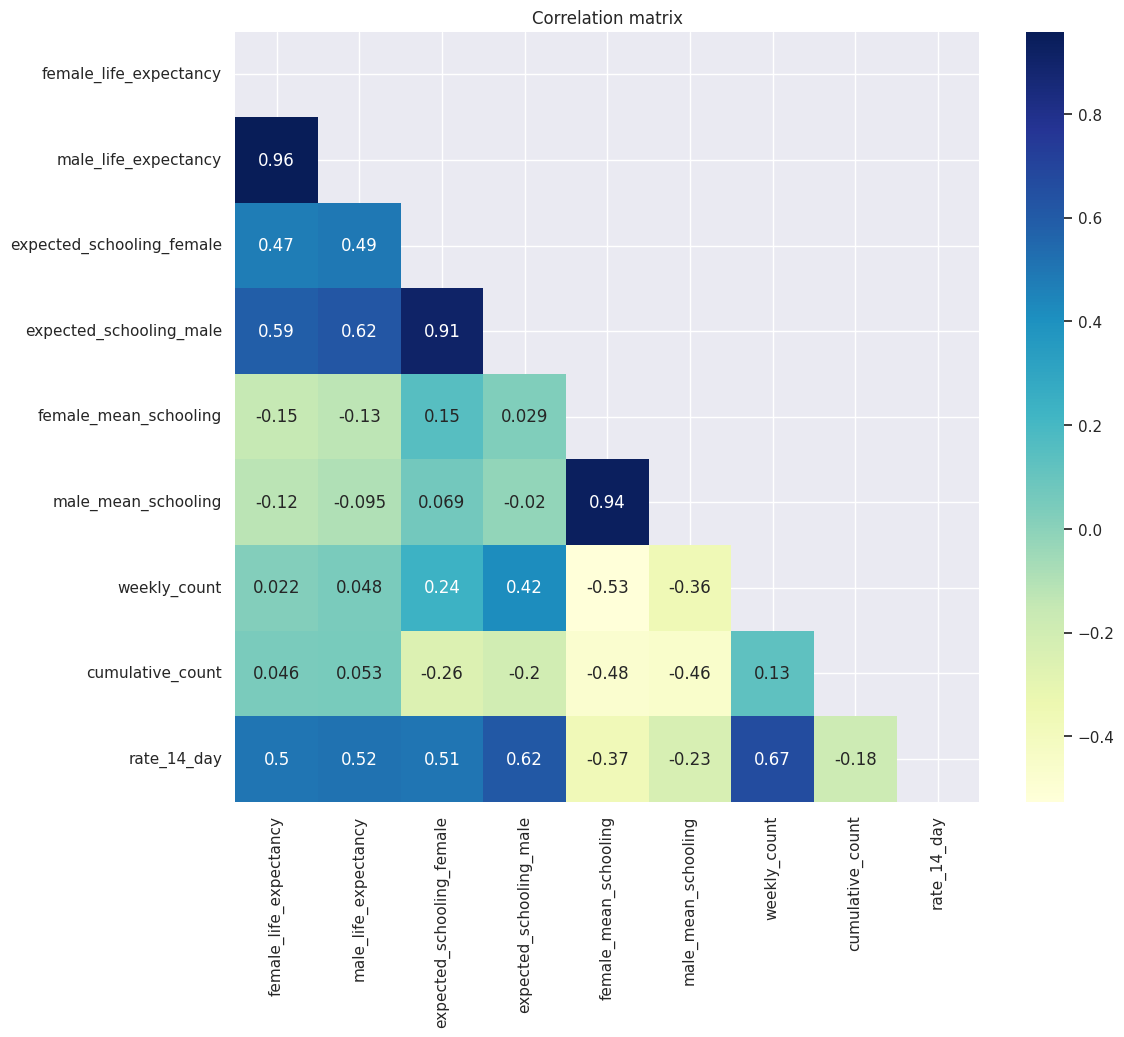

In [50]:
#get some numerical columns from df 
inner_joined_df = inner_joined_df[["female_life_expectancy", "male_life_expectancy", 
                                  "expected_schooling_female", "expected_schooling_male",
                                 "female_mean_schooling", "male_mean_schooling",
                                  "weekly_count", "cumulative_count", "rate_14_day"
                                 ]]
corr= inner_joined_df.corr()
# get correlation of different int att
matrix = np.triu(corr)
plt.figure(figsize = (12,10))
plt.title("Correlation matrix")
sns.heatmap(corr, mask=matrix,annot=True, cmap="YlGnBu")

### We can see several correlations, mostly positive, given between the two dataframes.
* Relation between "rate-14-days" and female/male life expectancy both increse positively. 
* Relation between "cumulative_count" and female/male life expectancy both increse positively.
* Values from weekly_count increse when female/male mean schooling decrease